In [ ]:
#Importing all required libraries
#Created by Sanket Karve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

In [ ]:
!pip install PyPortfolioOpt
#Installing the Portfolio Optimzation Library

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Book.csv to Book (1).csv


In [ ]:
import io
df_stocks=pd.read_csv(io.BytesIO(uploaded['Book.csv']))

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt.cla import CLA
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter

In [ ]:
df_stocks.head(10)


,Bond,Stock,BAA Bonds
0,-0.022445,0.407312,0.001396
1,0.010438,-0.114579,-0.001421
2,-0.000091,-0.296736,-0.040102
3,-0.048689,-0.461475,-0.179908
4,0.077203,-0.097124,0.225196
5,0.008953,0.490222,0.120069
6,0.076851,-0.014669,0.185381
7,0.043045,0.465729,0.131402
8,0.048454,0.317709,0.112113
9,0.011033,-0.356126,-0.046920


In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame((df_stocks))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Bond,Stock,BAA Bonds
Bond,1.000000,0.016357,0.596646
Stock,0.016357,1.000000,0.439323
BAA Bonds,0.596646,0.439323,1.000000


In [ ]:
#Checking if any NaN values in the data
nullin_df = pd.DataFrame(df_stocks)
print(nullin_df.isnull().sum())

Bond         0
Stock        0
BAA Bonds    0
dtype: int64


In [ ]:
#Annluaized Return
mu = expected_returns.mean_historical_return(df_stocks,returns_data=True,frequency=1,compounding=False) 
#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df_stocks,returns_data=True,frequency=1)
print(mu)

Bond         0.017493
Stock        0.081753
BAA Bonds    0.038219
dtype: float64


In [ ]:
#Max Sharpe Ratio - Tangent to the EF (Tangency Portfolio)
from pypfopt import objective_functions, base_optimizer
ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe(risk_free_rate=0) #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)


OrderedDict([('Bond', 0.02307), ('Stock', 0.20462), ('BAA Bonds', 0.77231)])


In [ ]:
ef.portfolio_performance(verbose=True,risk_free_rate=0) 
#rfr 0 as returns are already risk adjusted
#Tangent Portfolio

Expected annual return: 4.7%
Annual volatility: 8.8%
Sharpe Ratio: 0.53


(0.04664878371544156, 0.08756357412228613, 0.5327418870579063)

In [ ]:
#Min Volatility Portfolio
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)) #weight bounds in negative allows shorting of stocks
minvol=ef1.min_volatility()
minvol_pwt=ef1.clean_weights()
print(minvol_pwt)

OrderedDict([('Bond', 0.61652), ('Stock', 0.05432), ('BAA Bonds', 0.32916)])


In [ ]:
ef1.portfolio_performance(verbose=True, risk_free_rate = 0)

Expected annual return: 2.8%
Annual volatility: 6.8%
Sharpe Ratio: 0.41


(0.027806433265616264, 0.06760455530323314, 0.41131005360353934)

In [ ]:
#Min Volatility for target return
ef2 = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)) #weight bounds in negative allows shorting of stocks
ef2.add_objective(objective_functions.L2_reg, gamma=1)
mvar=ef2.efficient_return(target_return=0.075)
mvar_pwt=ef2.clean_weights()
print(mvar_pwt)

OrderedDict([('Bond', -0.05286), ('Stock', 0.81972), ('BAA Bonds', 0.23315)])


In [ ]:
ef2.portfolio_performance(verbose=True, risk_free_rate = 0)

Expected annual return: 7.5%
Annual volatility: 17.2%
Sharpe Ratio: 0.44


(0.075, 0.17179571947837177, 0.4365650100463773)

In [ ]:
from pypfopt.cla import CLA
from pypfopt import discrete_allocation

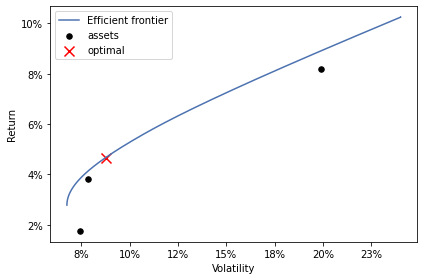

In [ ]:
cl_obj = CLA(mu, Sigma, weight_bounds=(-1,1))
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False,points=1000000)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))